# Shared Memory Carveout Comparison

This notebook compares the affect of setting the shared memory carveout to match the shared memory usage vs setting the carveout to the full shared memory capacity.

### Define the file paths

In [1]:
import os
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier

custom_directory_path = 'SetCapacityData'
max_directory_path = 'MaxCarveout'
custom_paths = []
max_paths = []

# List all files in the custom carveout directory
for filename in os.listdir(custom_directory_path):
  if filename == '.DS_Store':
    continue
  file_path = os.path.join(custom_directory_path, filename)
  if os.path.isfile(file_path):
      custom_paths.append(file_path)

# List all files in the max carveout directory
for filename in os.listdir(max_directory_path):
  if filename == '.DS_Store':
    continue
  file_path = os.path.join(max_directory_path, filename)
  if os.path.isfile(file_path):
    max_paths.append(file_path)

# Order the paths so that the arrays have the capacities in the same order for plotting
custom_paths = sorted(custom_paths)
max_paths = sorted(max_paths)
print(custom_paths)
print(max_paths)

/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier
['SetCapacityData/AxavierSetSharedOne12th.csv', 'SetCapacityData/BxavierSetSharedTwo12th.csv', 'SetCapacityData/CxavierSetSharedThree12th.csv', 'SetCapacityData/DxavierSetSharedFour12th.csv', 'SetCapacityData/ExavierSetSharedFive12th.csv', 'SetCapacityData/FxavierSetSharedSix12th.csv', 'SetCapacityData/GxavierSetSharedSeven12th.csv', 'SetCapacityData/HxavierSetSharedEight12th.csv', 'SetCapacityData/IxavierSetSharedNine12th.csv', 'SetCapacityData/JxavierSetSharedTen12th.csv', 'SetCapacityData/KxavierSetSharedEleven12th.csv', 'SetCapacityData/LxavierSetSharedTwelve12th.csv']
['MaxCarveout/AxavierMaxCarevoutOne12th.csv', 'MaxCarveout/BxavierMaxCarveoutTwo12th.csv', 'MaxCarveout/CxavierMaxCarveoutThree12th.csv', 'MaxCarveout/DxavierMaxCarveoutFour12th.csv', 'MaxCarveout/ExavierMaxCarveoutFive12th.csv', 'MaxCarveout/FxavierMaxCarveoutSix12th.csv', 'MaxCarveout/GxavierMaxCarveoutSeven12th.csv', 'MaxCarveout/HxavierMaxCarveo

### Load the data into arrays

In [2]:
import numpy as np
%cd ~/Desktop/Research/GPU-research/Preemptions
from analyzer_functions import *
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier

# Store all of the intervals in arrays
max_ivls_array = []
custom_ivls_array = []

for max_path, custom_path in zip(max_paths, custom_paths):
  # load in the data and calculate the preemption and execution intervals
  max_ivls, custom_ivls = data_loader(noSharedPath=max_path, sharedPath=custom_path, onlyPreemptIvls=True)

  # convert to microseconds
  max_ivls = np.array(max_ivls) / 1000
  custom_ivls = np.array(custom_ivls) / 1000

  # append to the interval arrays
  max_ivls_array.append(max_ivls)
  custom_ivls_array.append(custom_ivls)

/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier


## Plot the median lines

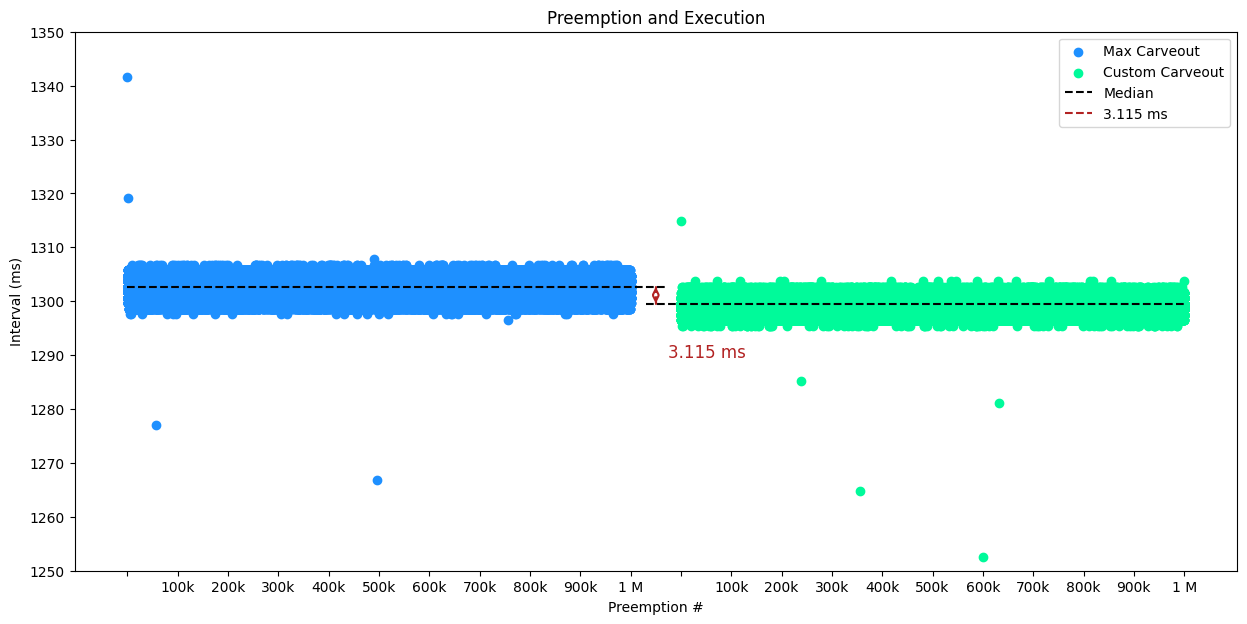

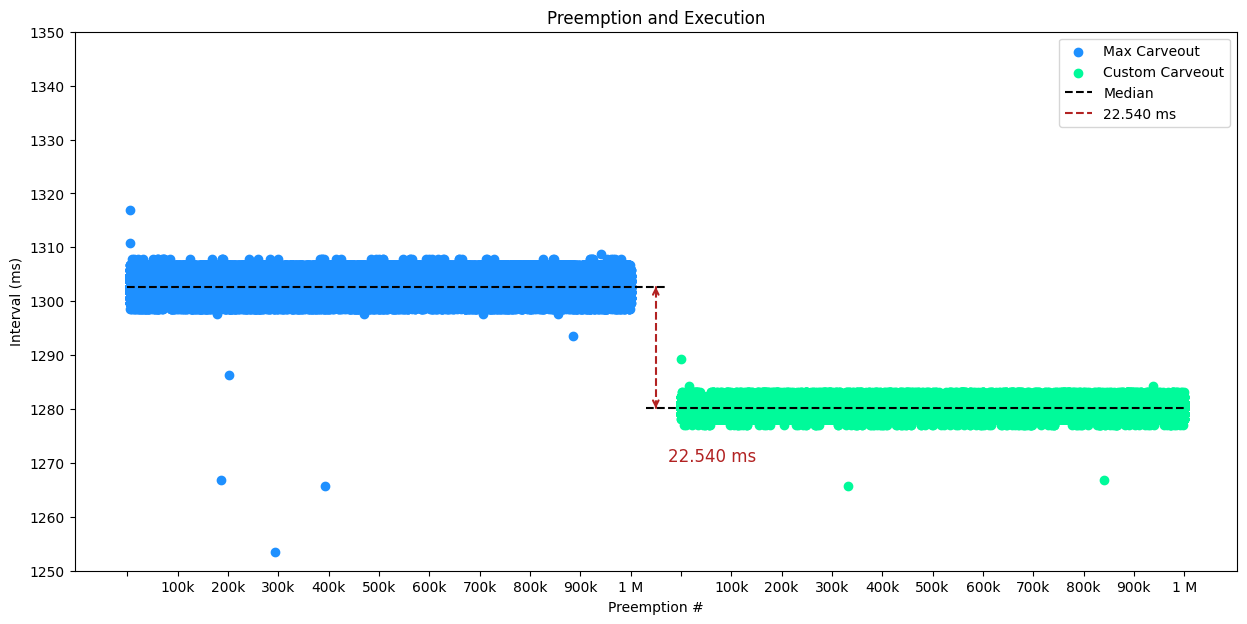

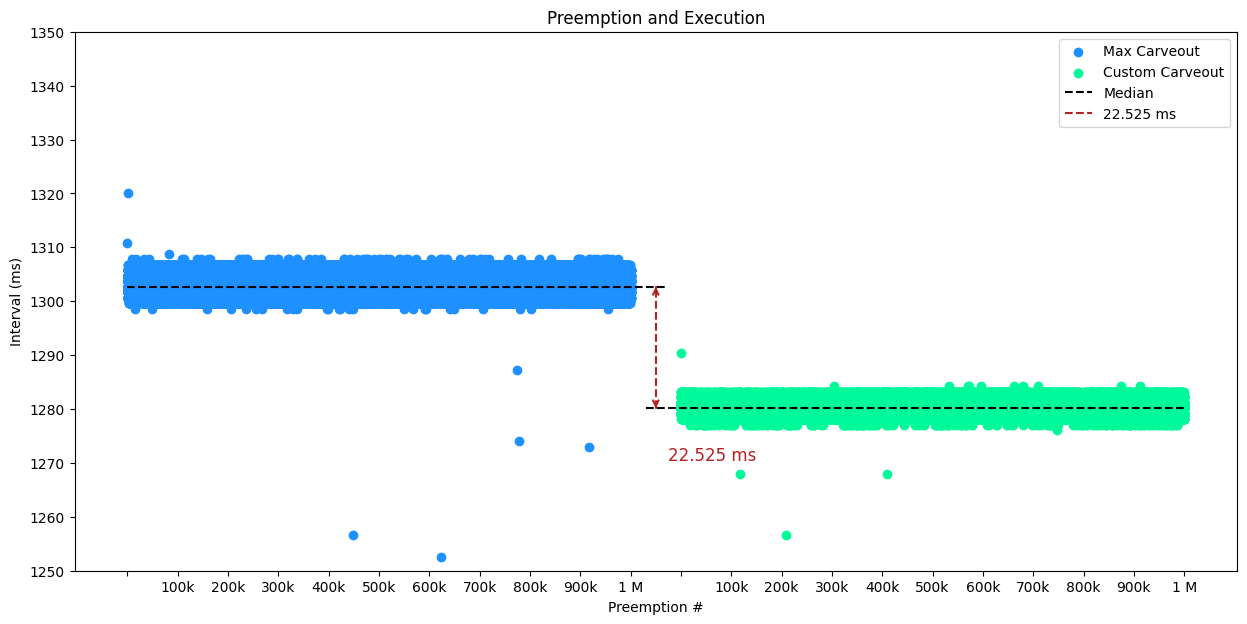

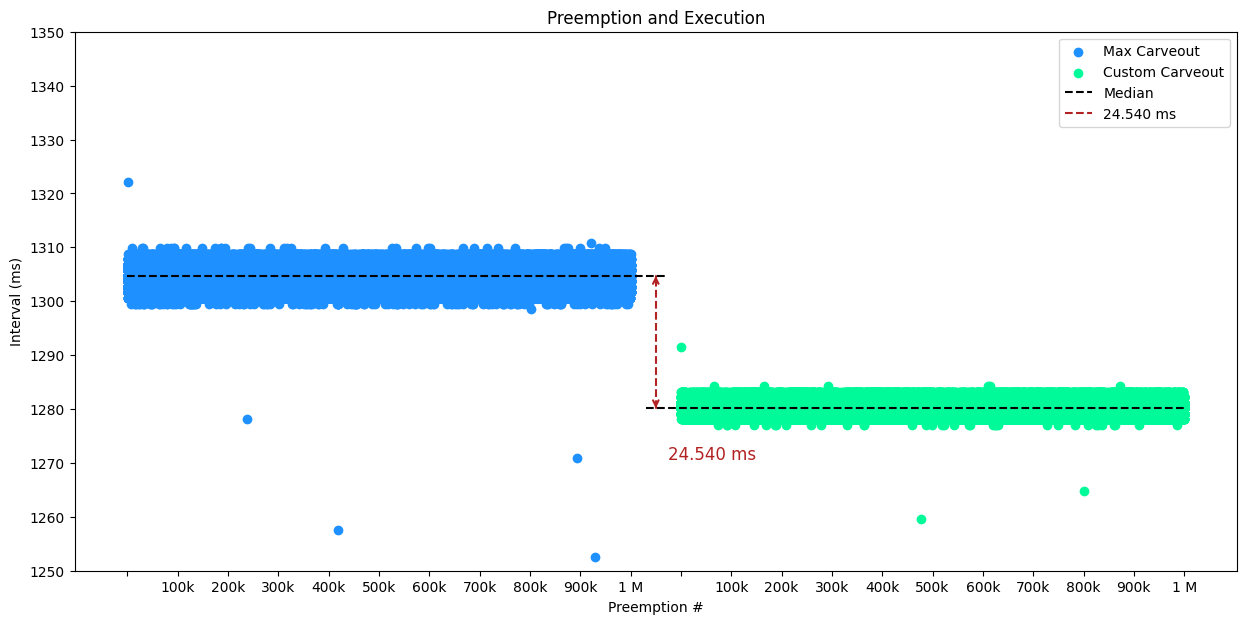

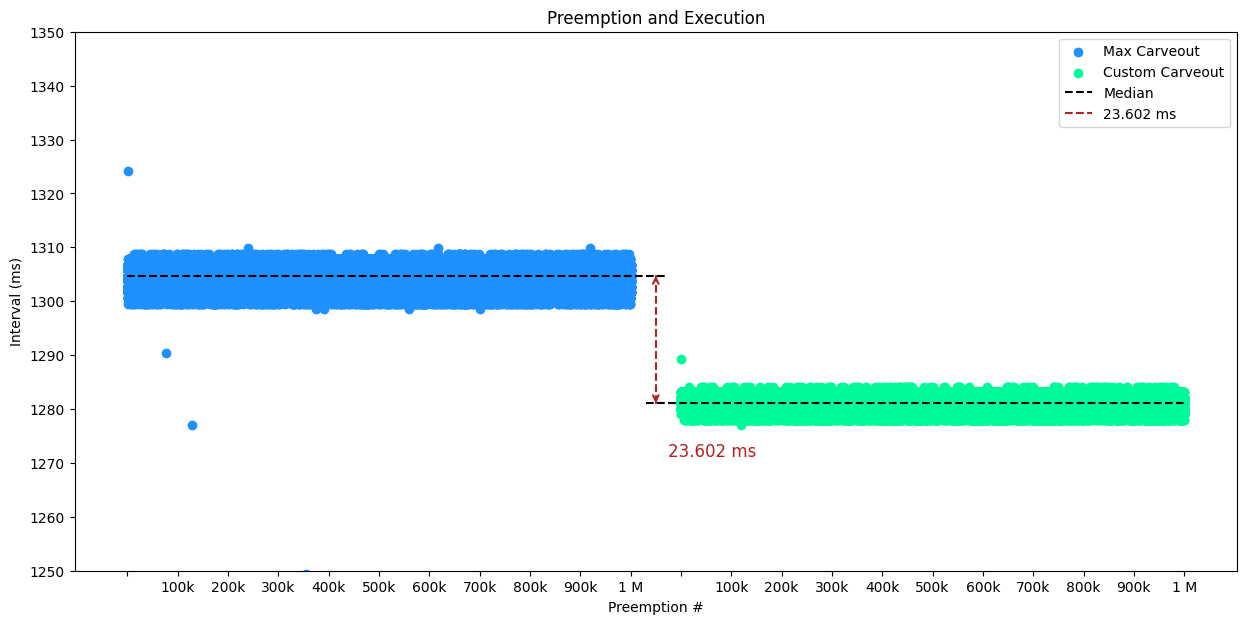

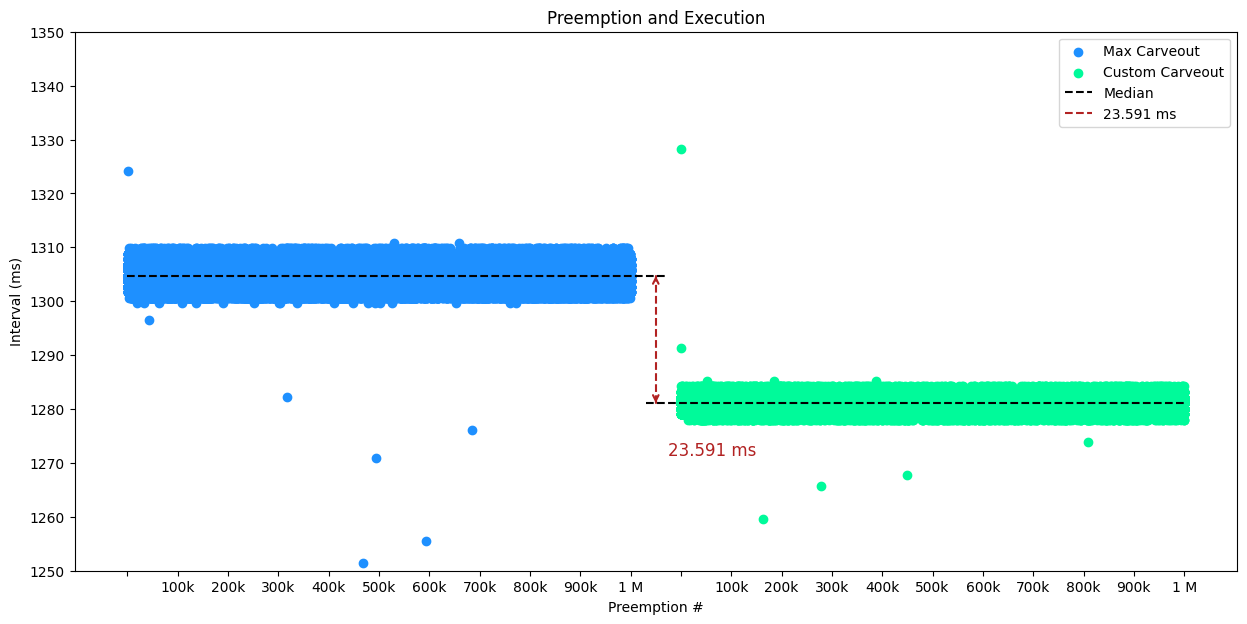

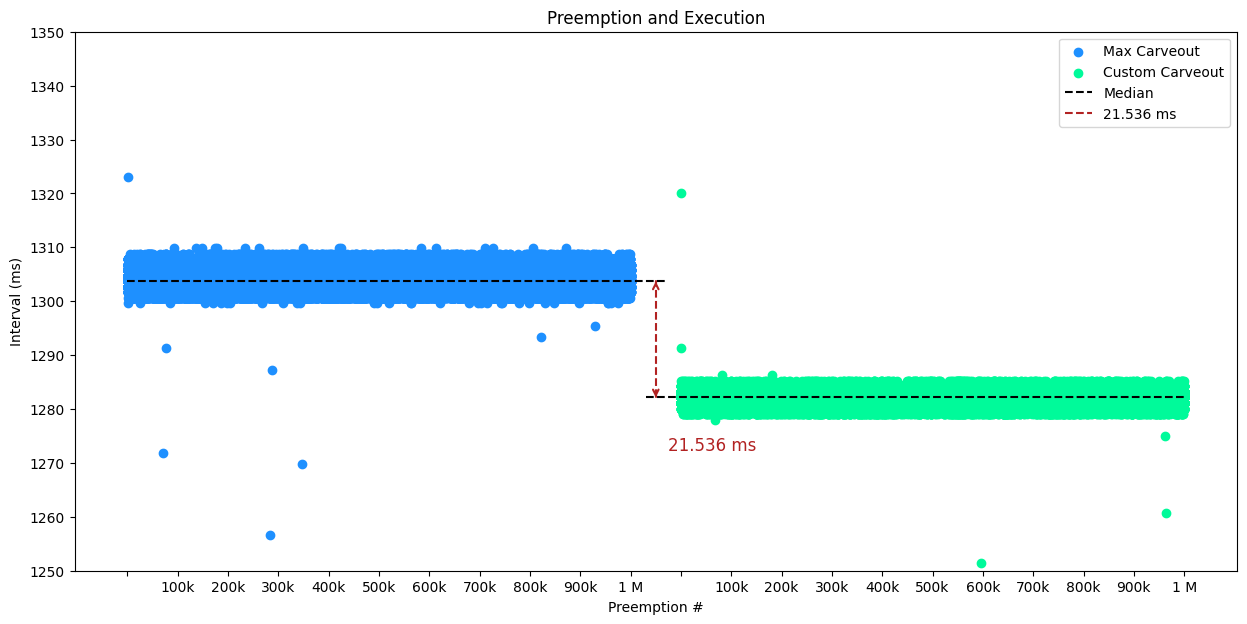

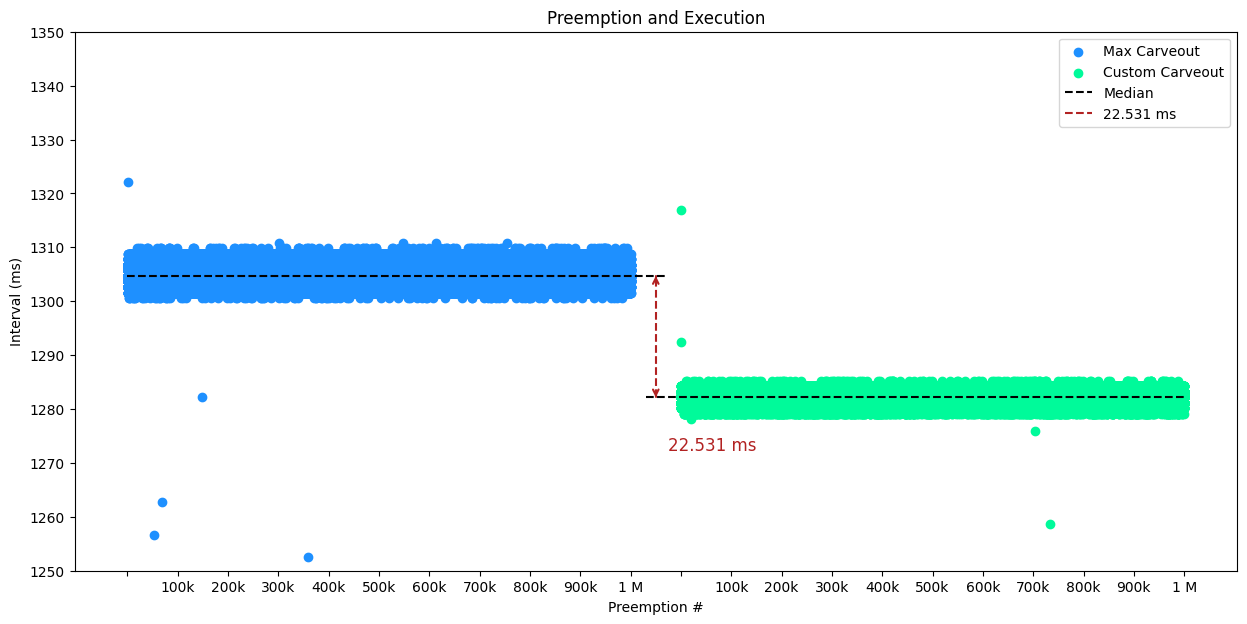

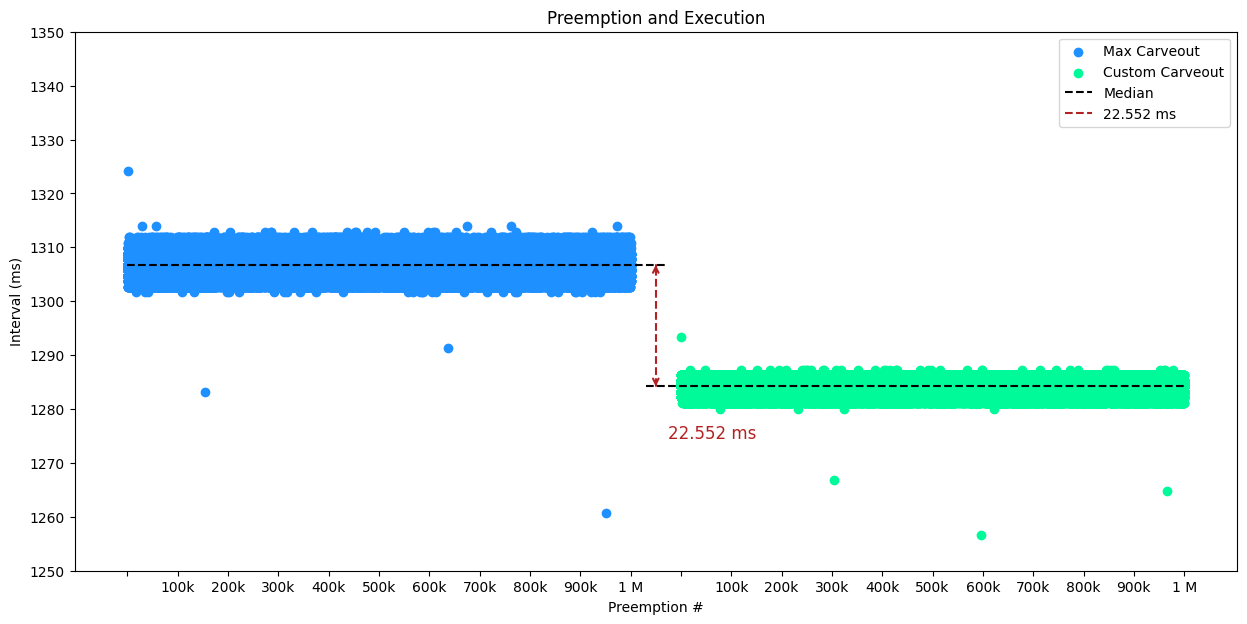

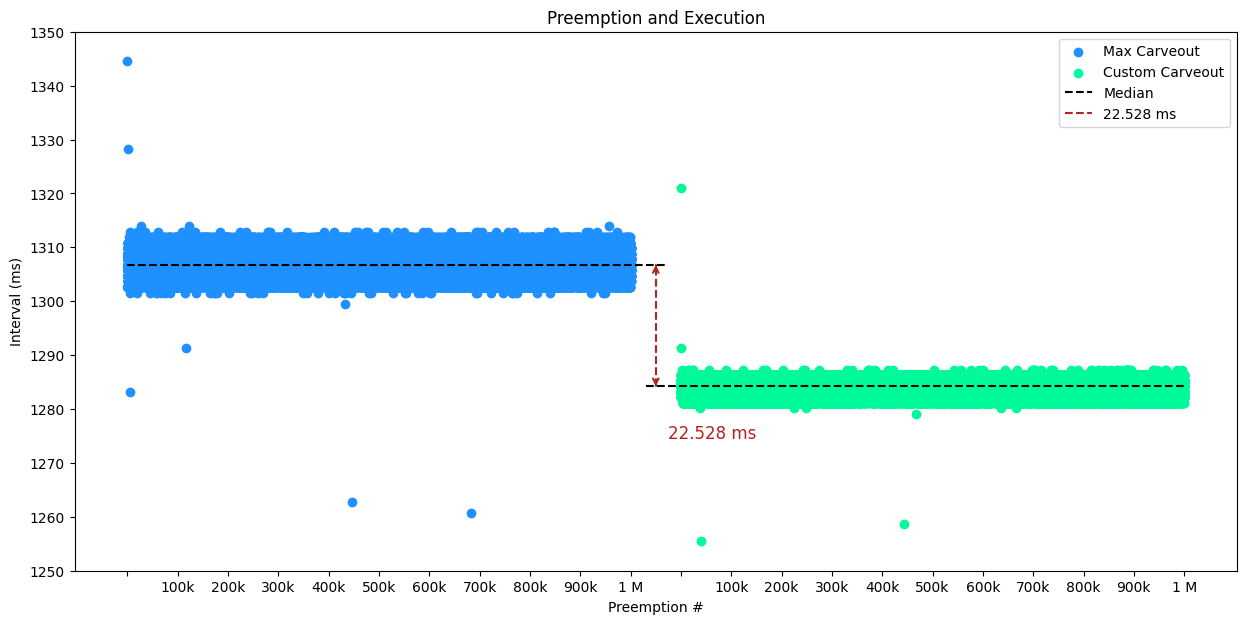

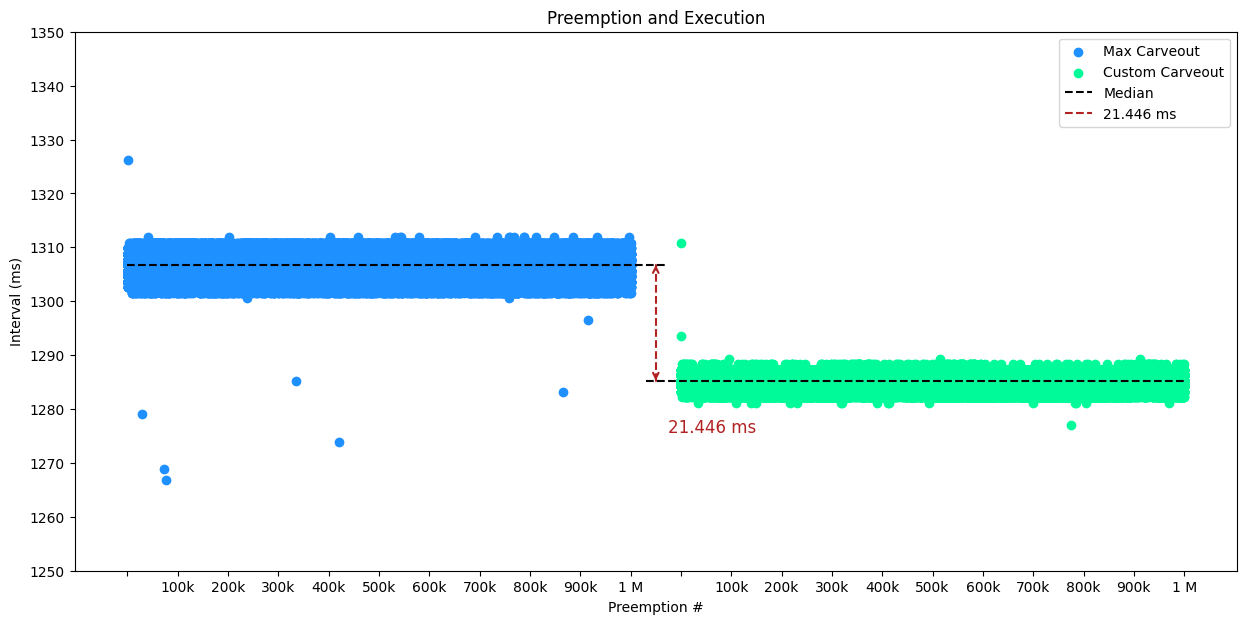

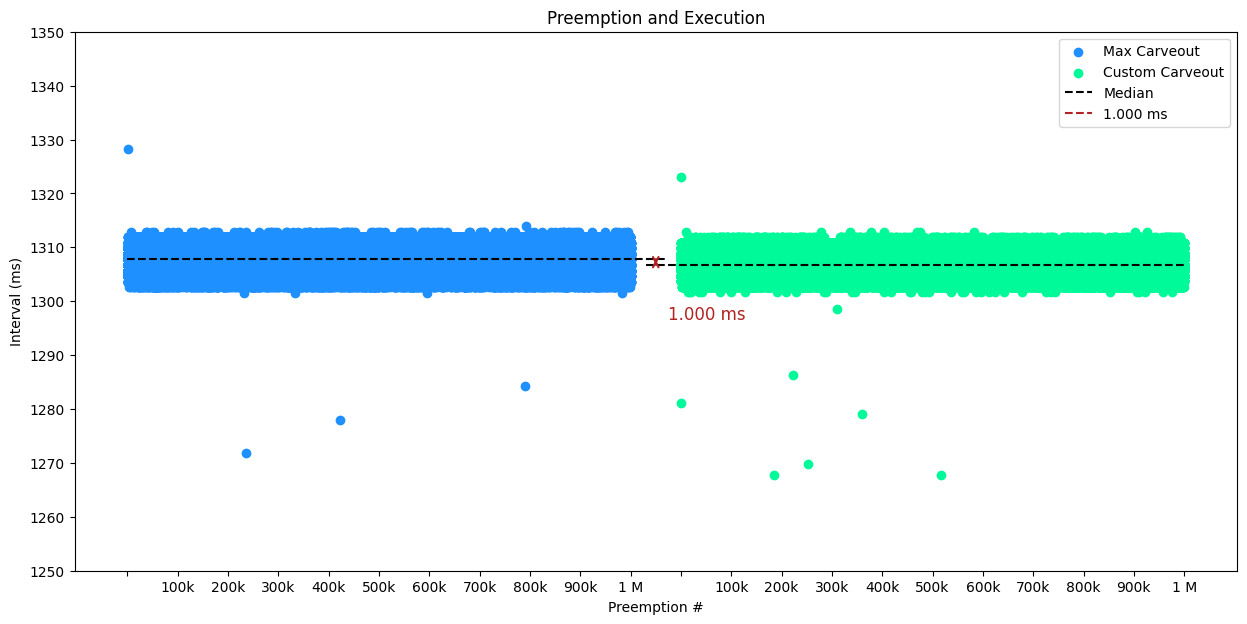

In [3]:
NUM_SAMPLES = 1000000
offset = NUM_SAMPLES // 10
for max_ivls, custom_ivls in zip(max_ivls_array, custom_ivls_array):
  plot_side_by_side(noSharedData=max_ivls, sharedData=custom_ivls, NUM_SAMPLES=NUM_SAMPLES, 
    firstLabel='Max Carveout', secondLabel='Custom Carveout', lowerBound=1250, upperBound=1350, medianLines=True, offset=offset)

## Plot the typical worst-case bounds

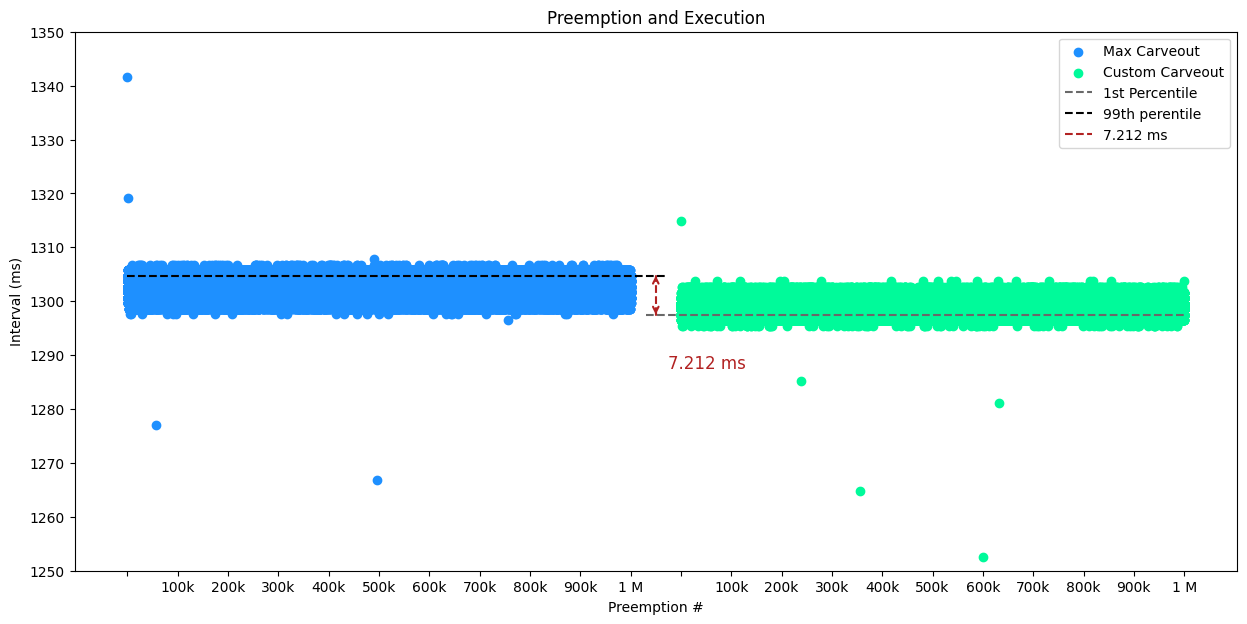

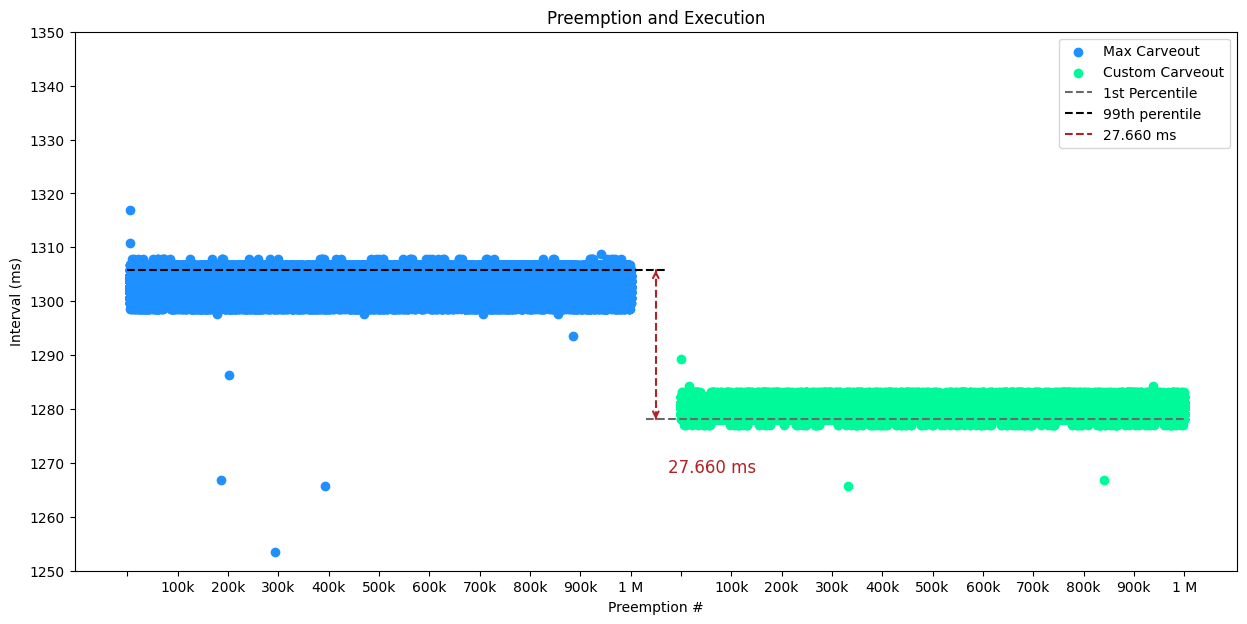

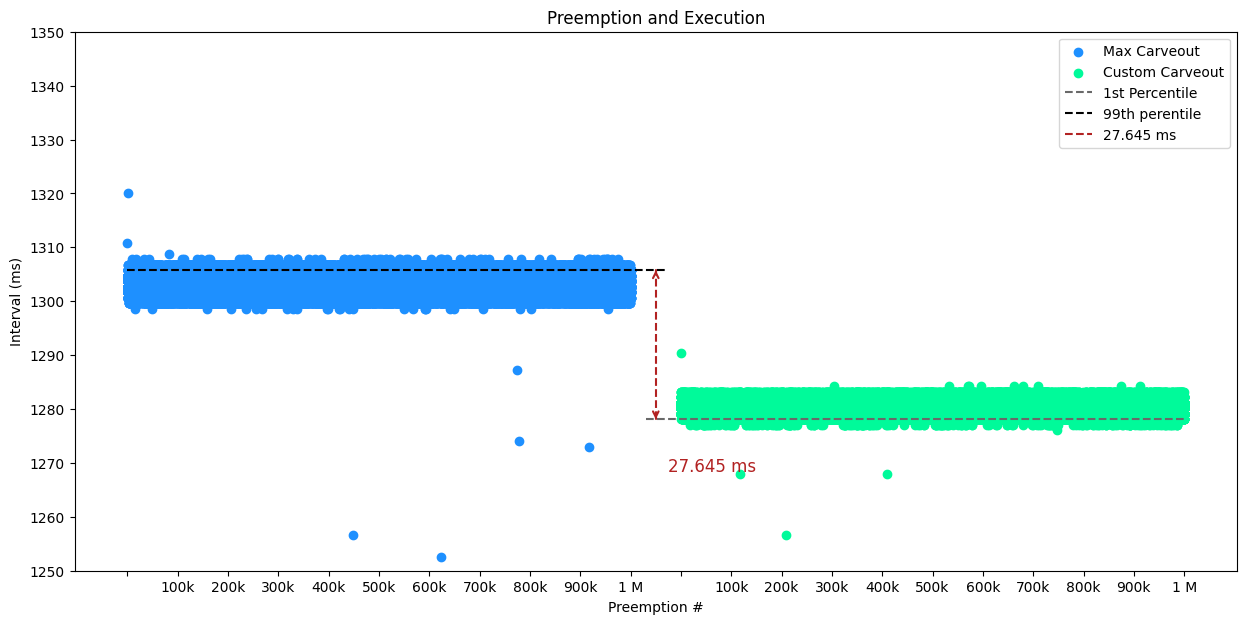

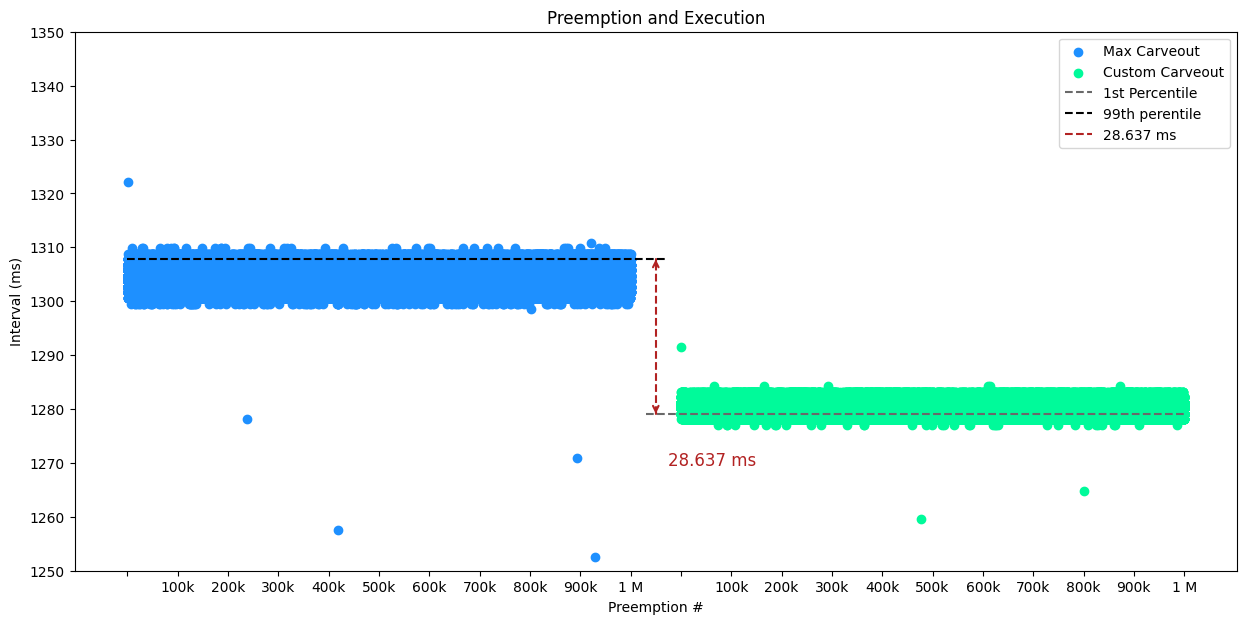

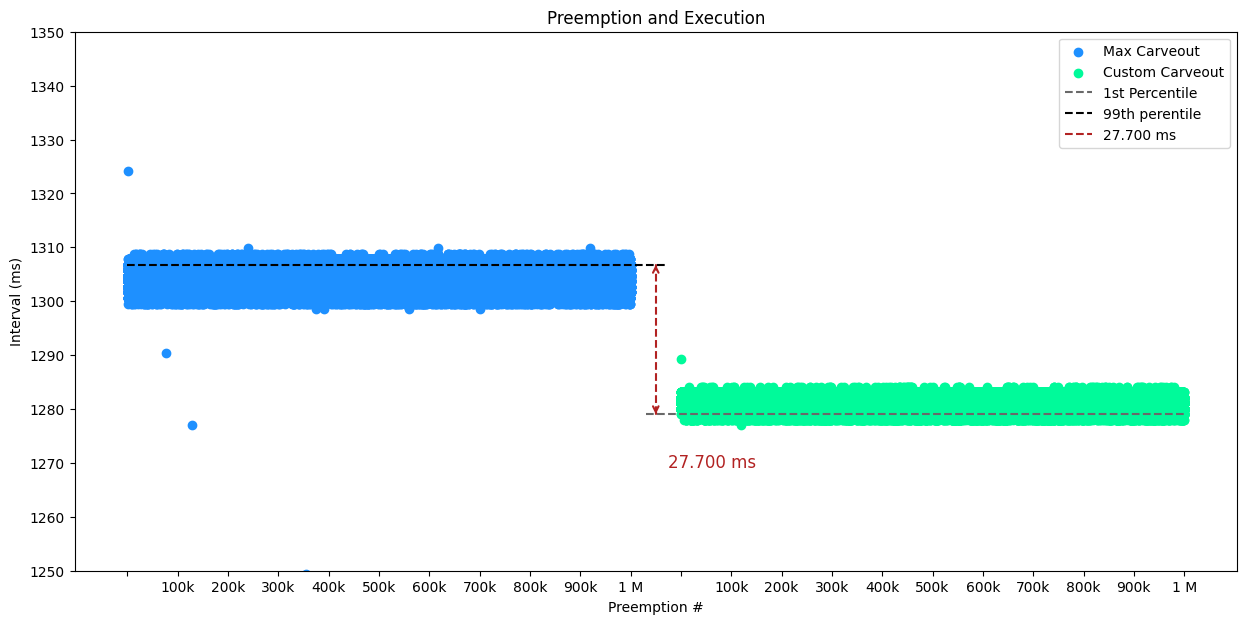

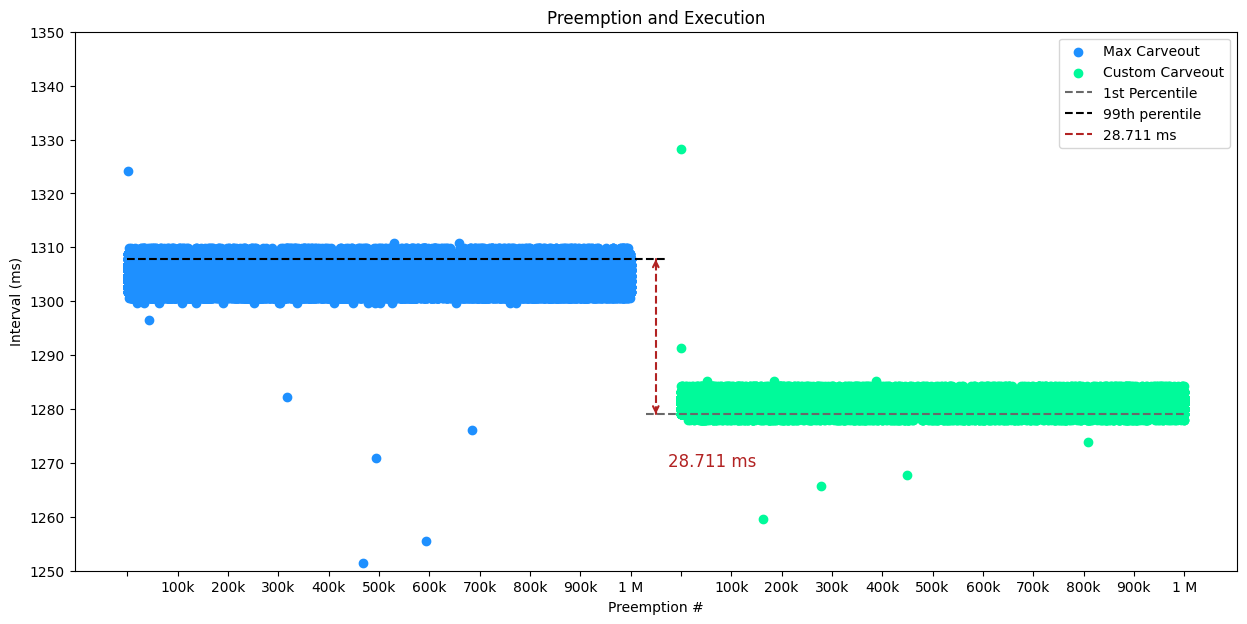

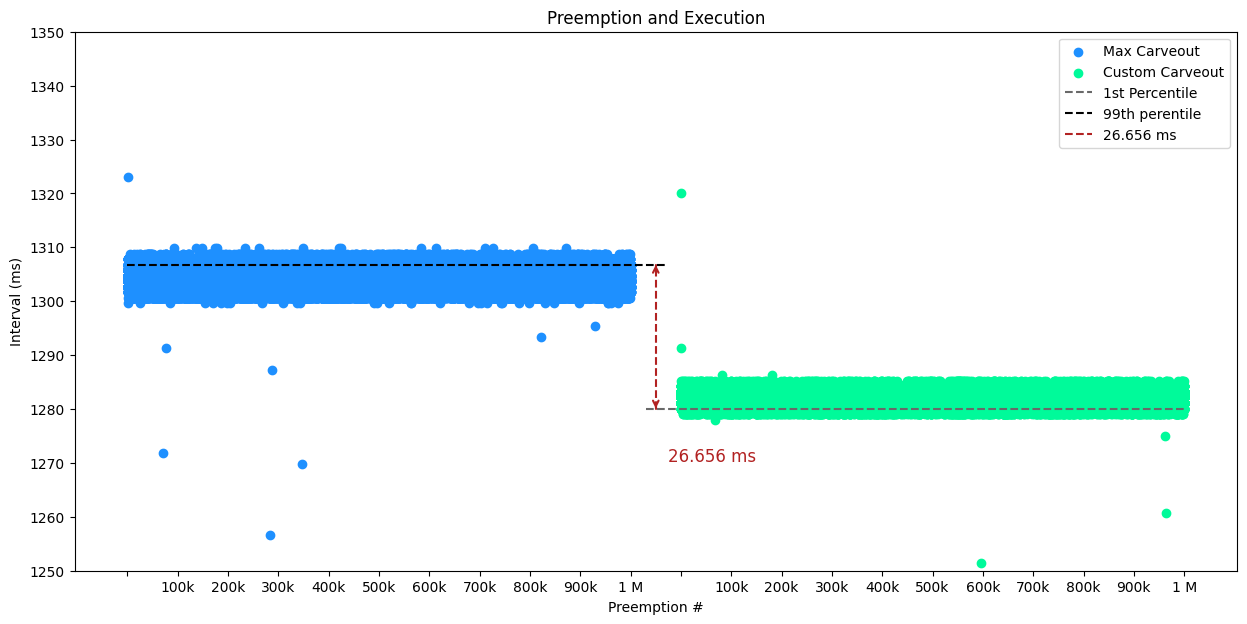

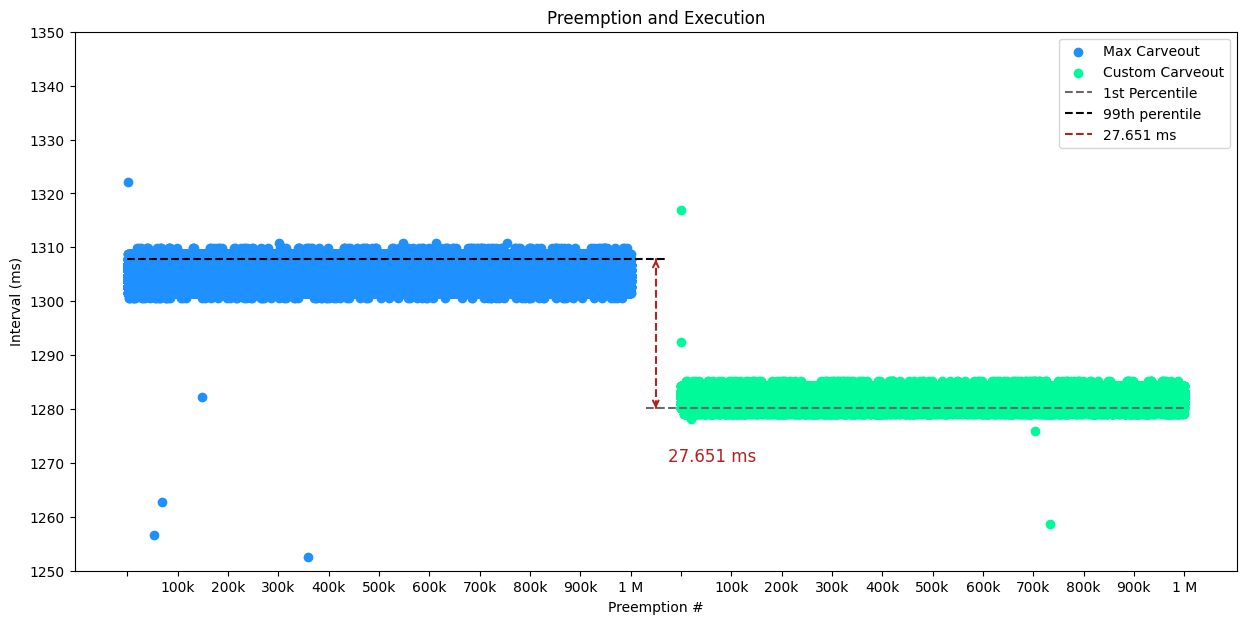

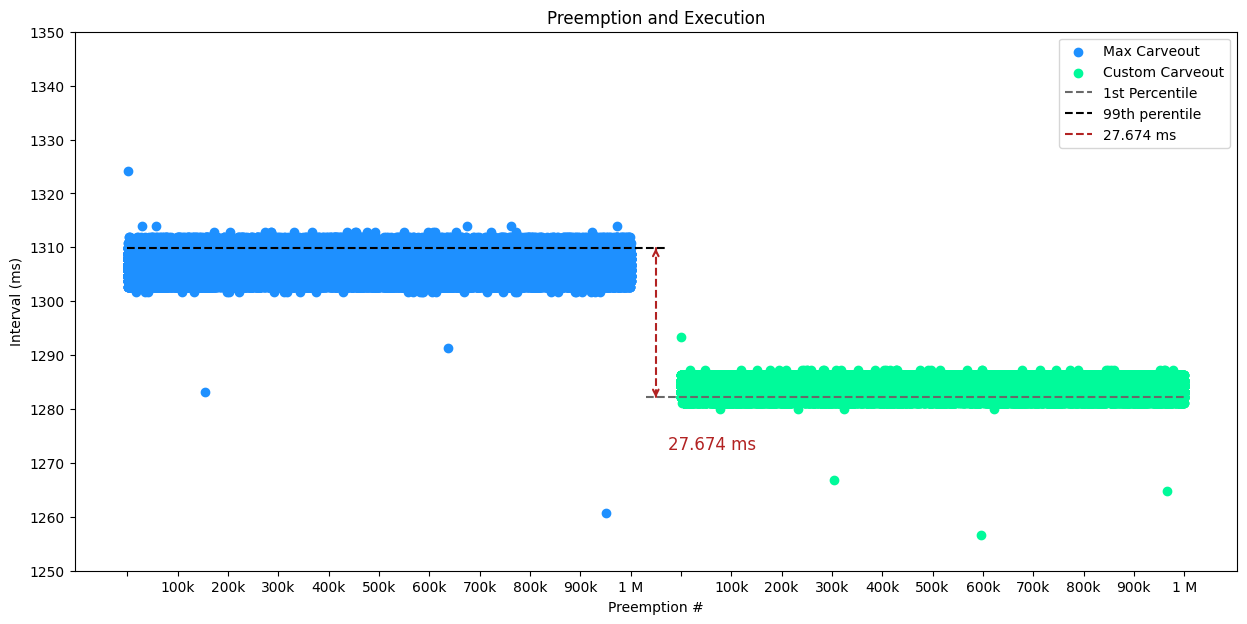

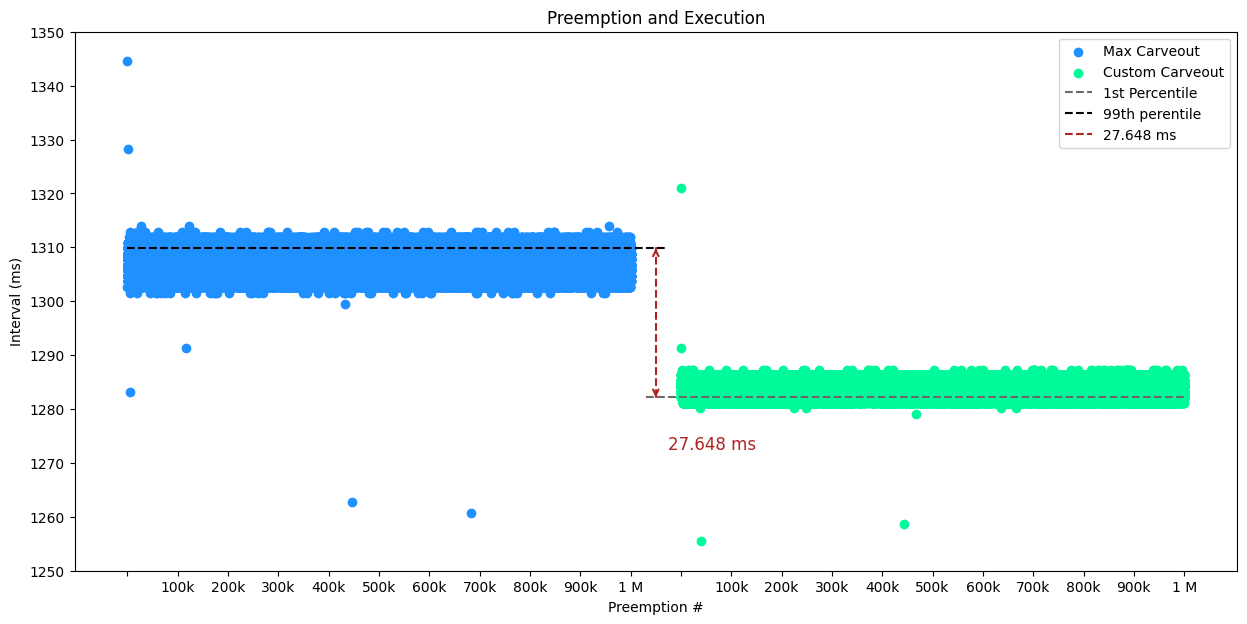

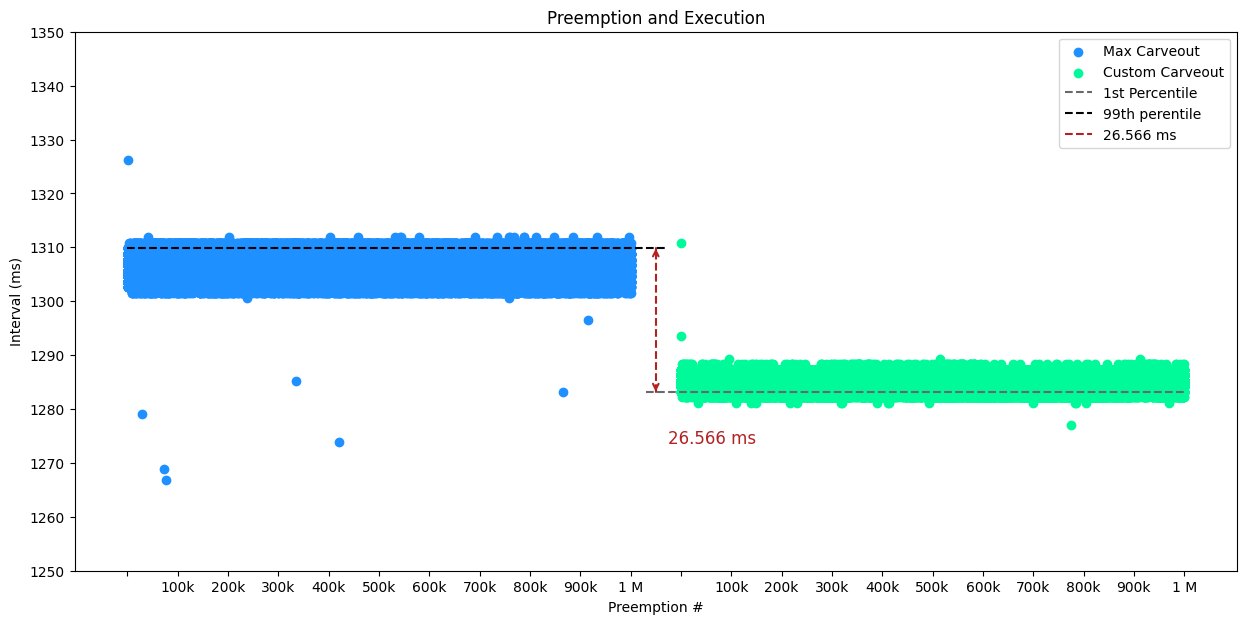

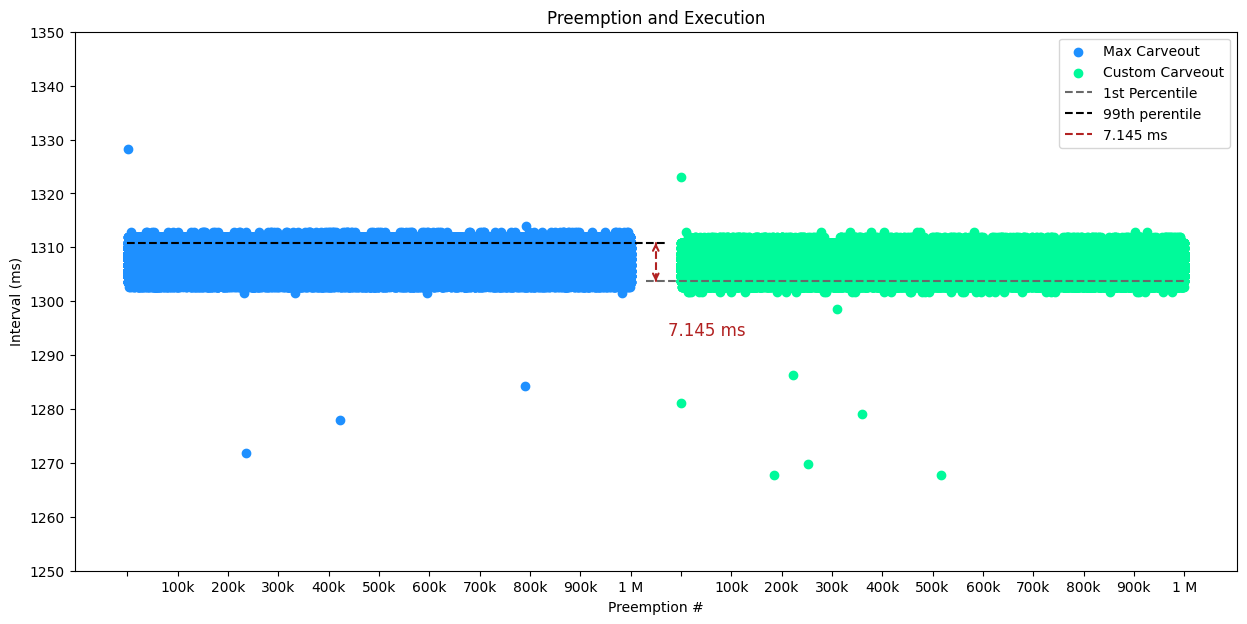

In [4]:
for max_ivls, custom_ivls in zip(max_ivls_array, custom_ivls_array):
  plot_side_by_side(noSharedData=max_ivls, sharedData=custom_ivls, NUM_SAMPLES=NUM_SAMPLES, 
    firstLabel='Max Carveout', secondLabel='Custom Carveout', lowerBound=1250, upperBound=1350, worstCaseLines=True, offset=offset)

## Plot the variation bounds for each trial

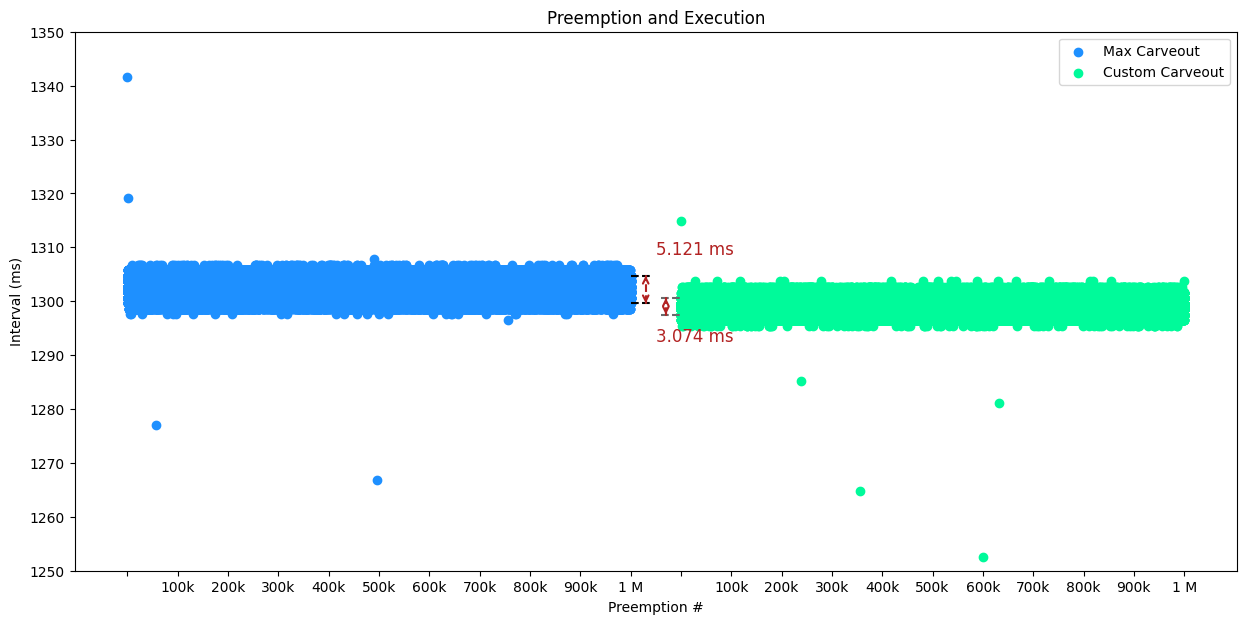

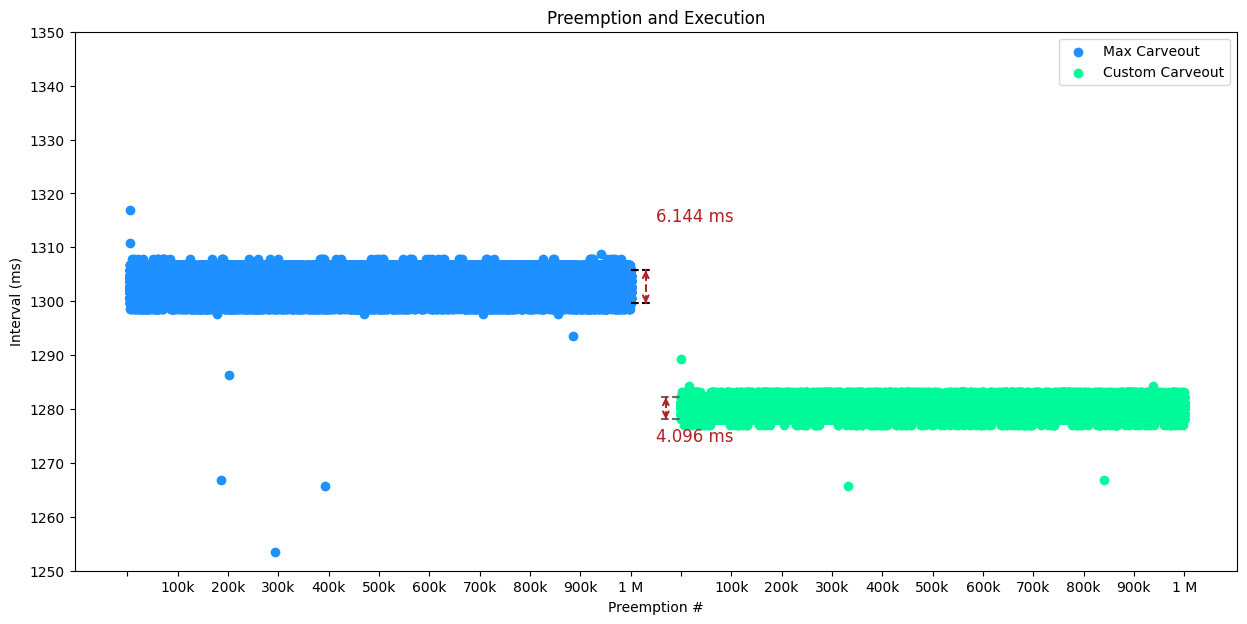

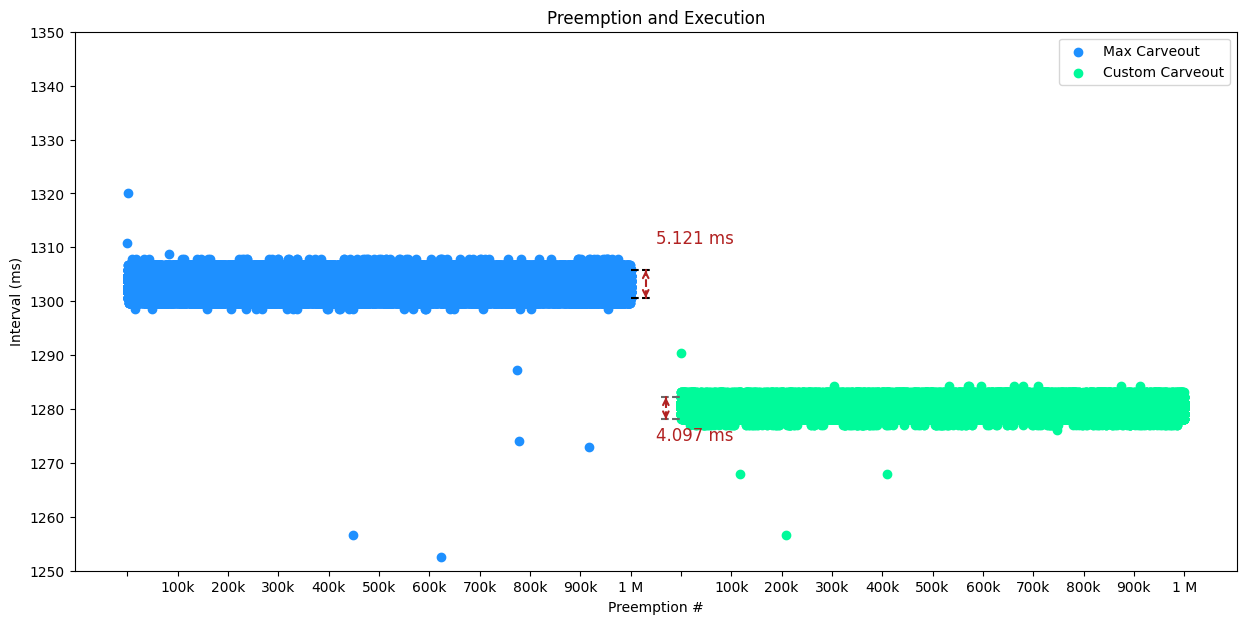

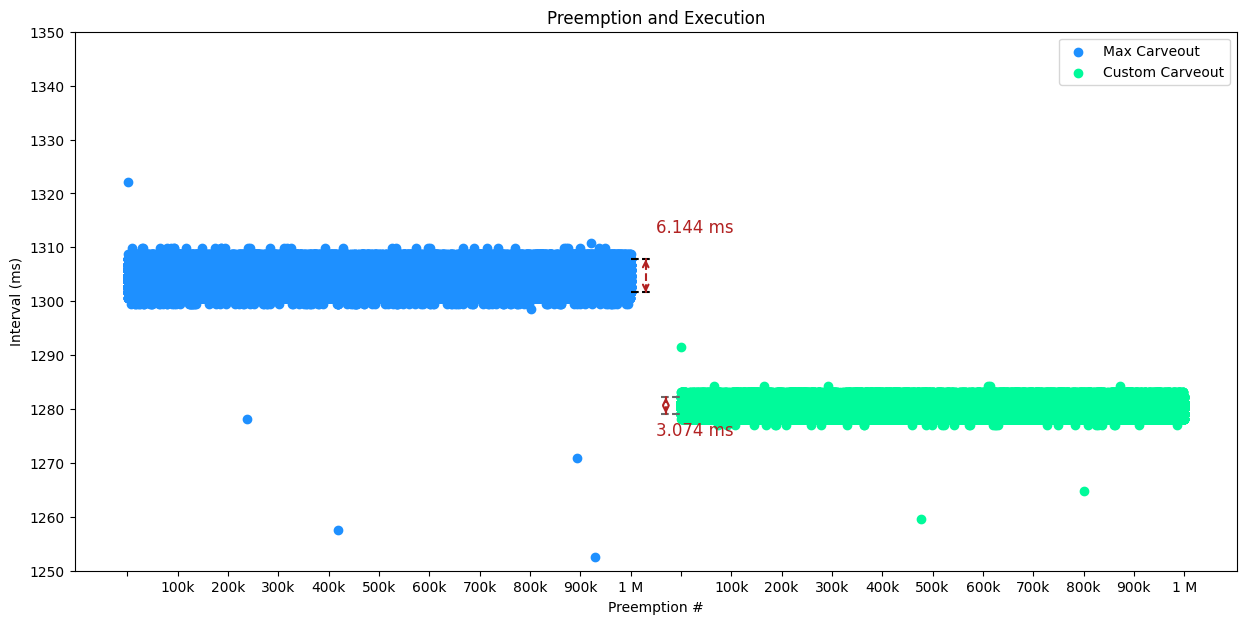

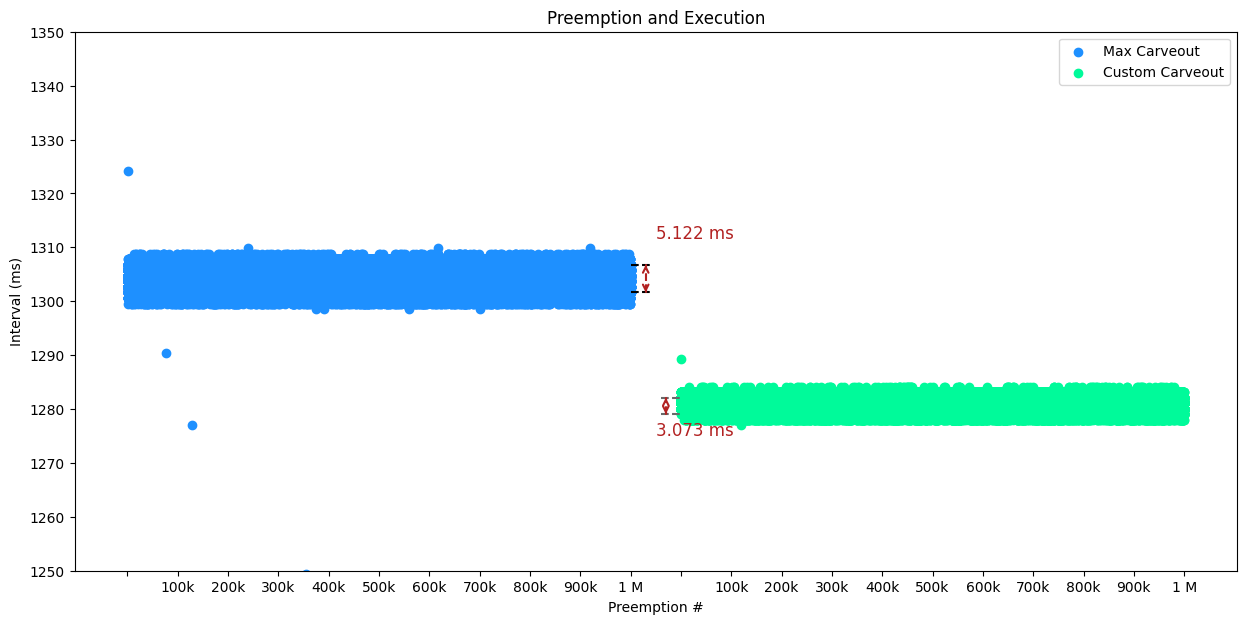

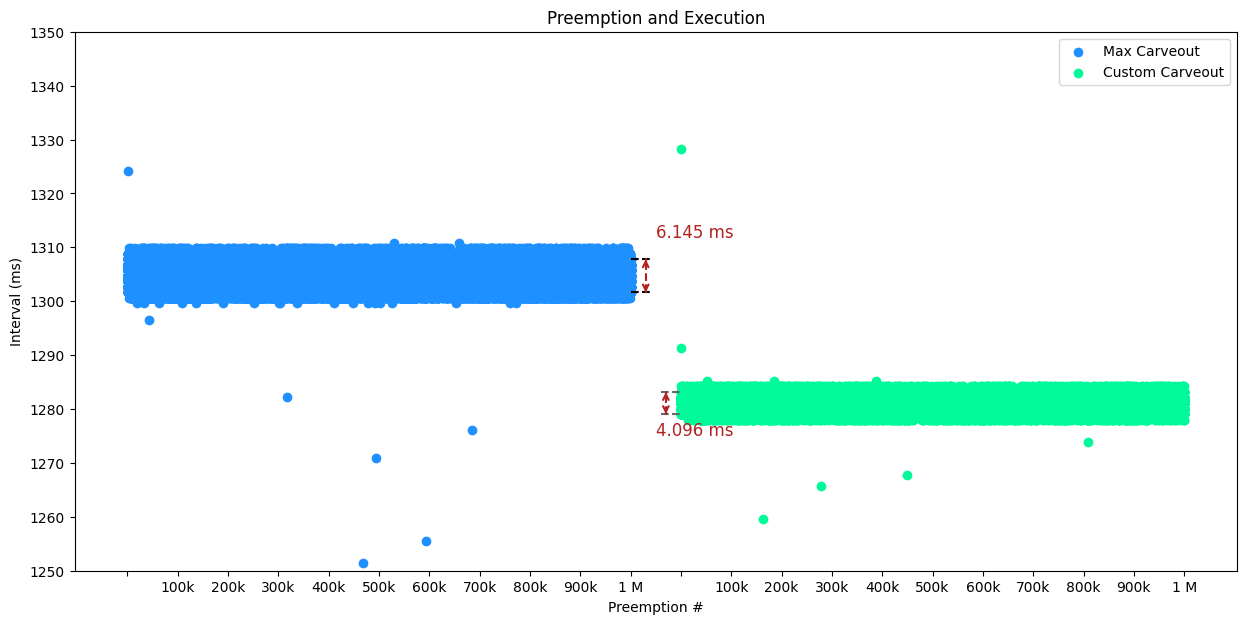

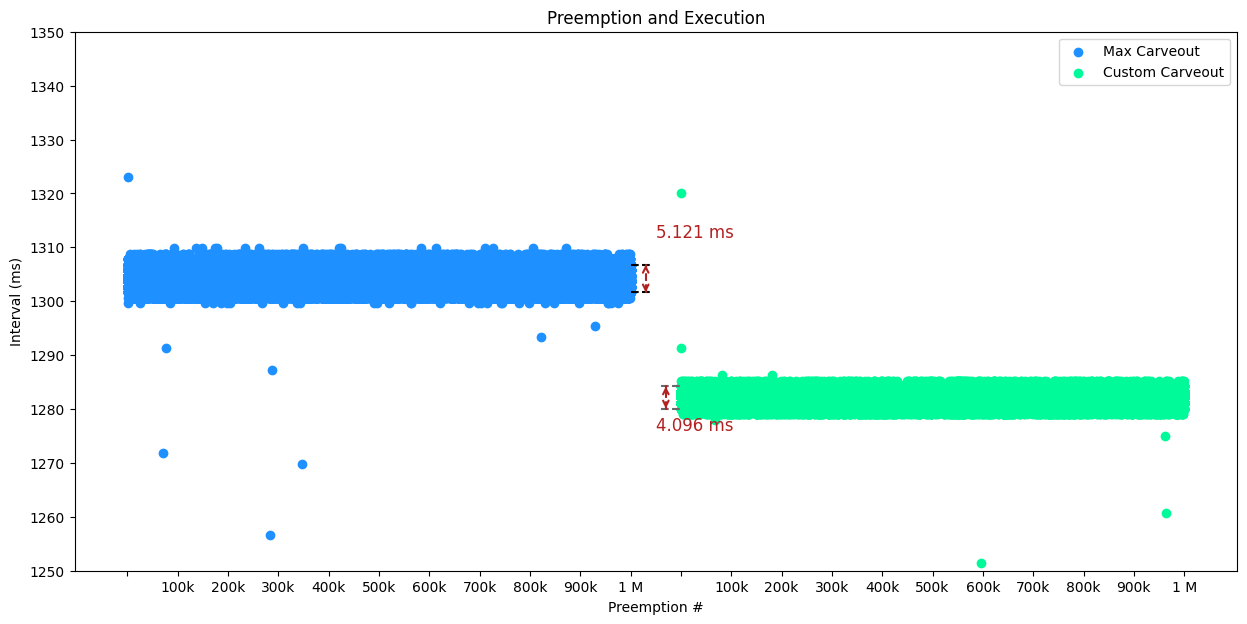

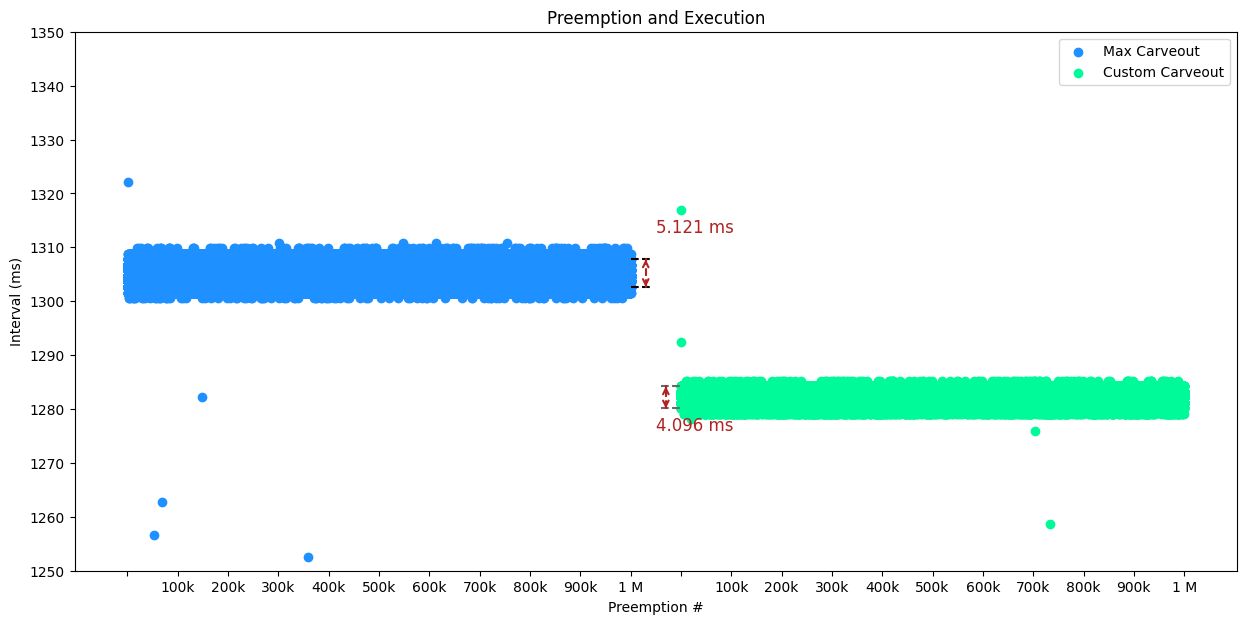

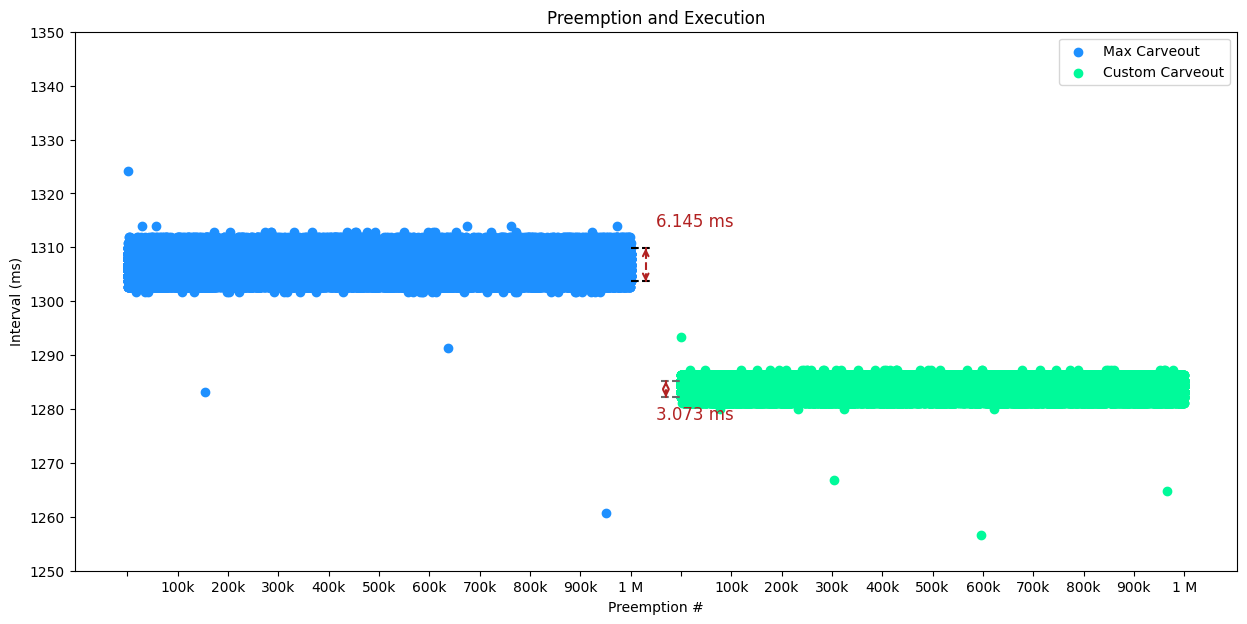

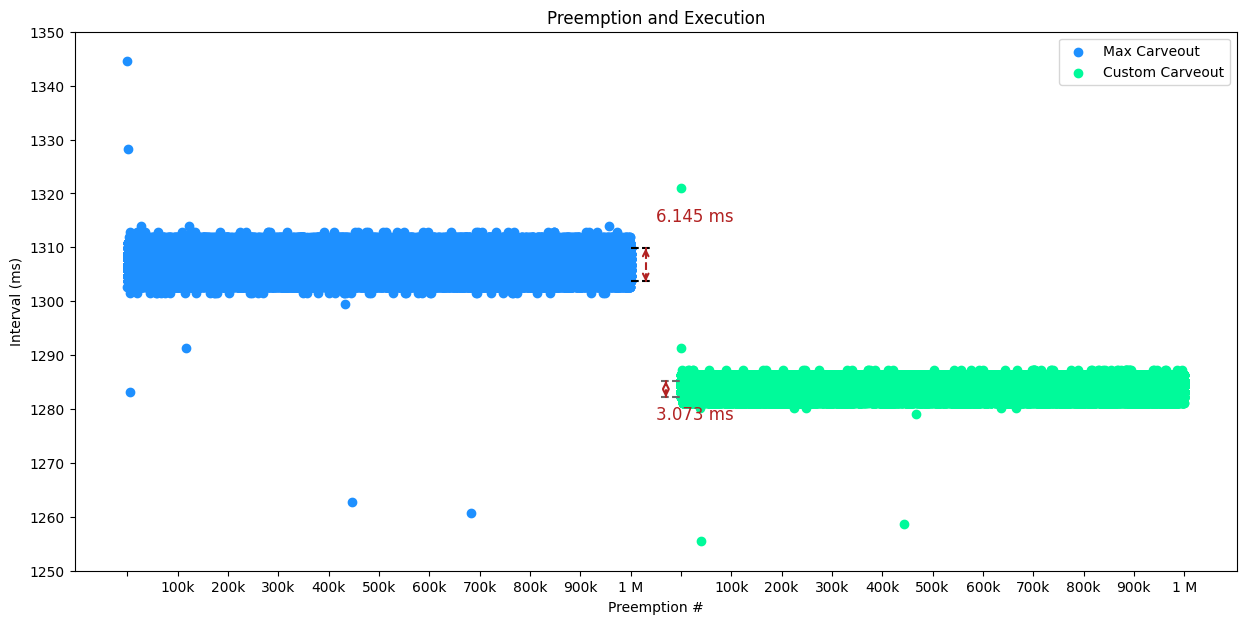

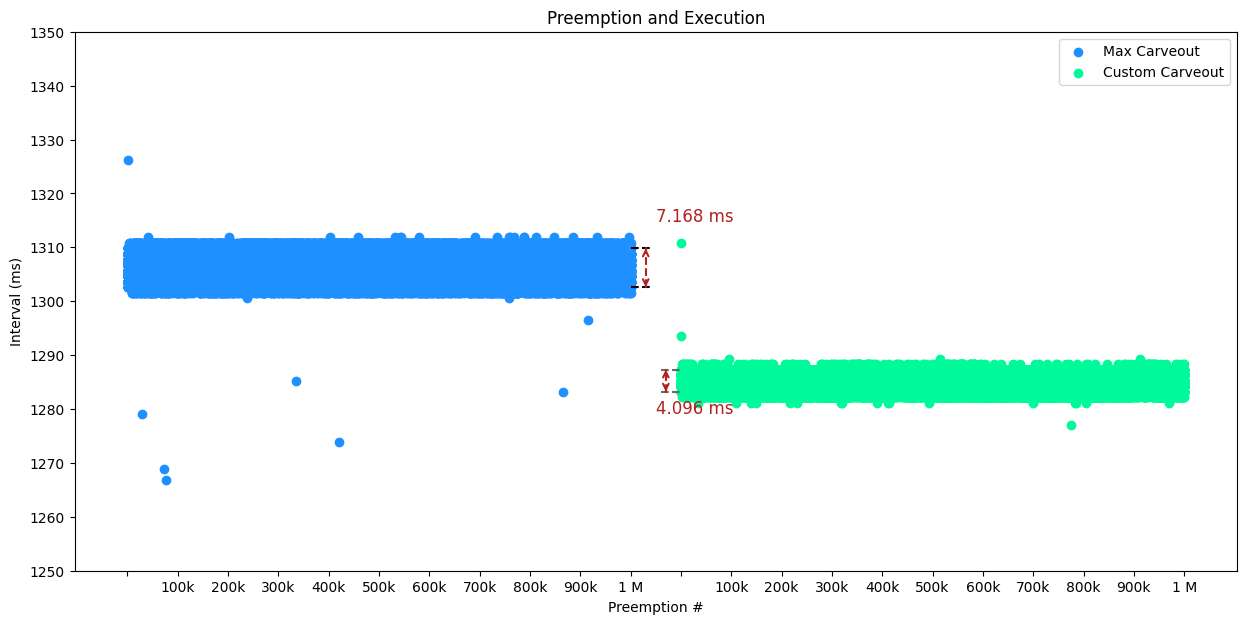

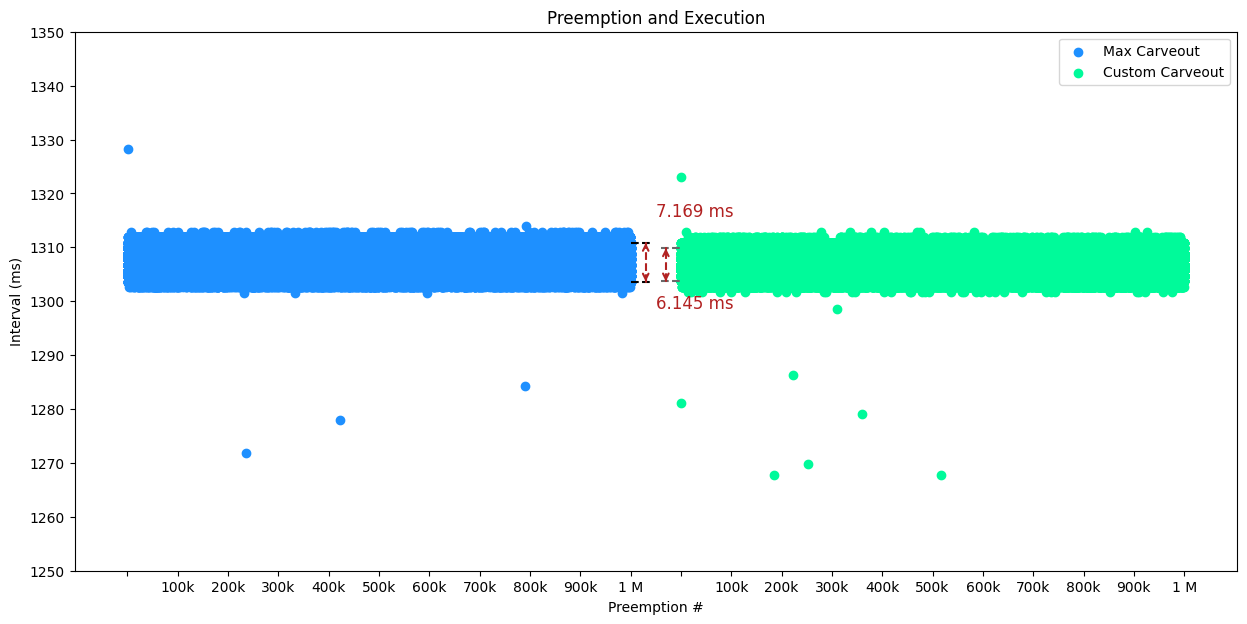

In [5]:
for max_ivls, custom_ivls in zip(max_ivls_array, custom_ivls_array):
  plot_side_by_side(noSharedData=max_ivls, sharedData=custom_ivls, NUM_SAMPLES=NUM_SAMPLES, 
    firstLabel='Max Carveout', secondLabel='Custom Carveout', lowerBound=1250, upperBound=1350, blockLines=True, offset=offset)

## Box plots